# <center>Credit Fraud Detector</center>
## Introduction
In this project, we will use various predictive models to detect fraud in all transactions. As described in the dataset, the features are scaled and the names of the features are not shown due to privacy reasons. So we may not perform feature engineering in the first instance. However, we can still analyze some important aspects of the dataset.
https://www.kaggle.com/mlg-ulb/creditcardfraud

## Our Goals:
* Understand the distribution of the dataset.
* Split the dataset into three parts for training, cross_validation and testing purposes.
* Deal with the imbalanced aspect of the dataset. 
* Apply various classifiers and test their performance.
* Perform feature engineering by the correlation matrix.
* Understand common mistakes made with imbalanced datasets.

## Outline:
#### Understanding our data

   a) Gather Sense of our data


#### Preprocessing

   a) Splitting the Data to training and testing set.
    
   b) Splitting the training set by k-fold cross validation method.


#### Imbalanced data

Since the fraud transaction actually has a very small proportion of all transactions. We are getting a very imbalanced dataset. Here are some ways that we may consider to deal with this problem.

*1. Resampling methods* 

We use over-sampling techniques, which is adding copies of the minority class(better when we have little data),
and under-sampling techniques, which is delecting instances of the majority class, to get a more balanced dataset. Common methods include:
  * Oversampling:
    * random oversampling
    * SMOTE


  * Undersampling:
    * random undersampling


  * Combination:
    * SMOTETomek_resampling

In this project, we will use the SMOTE method. It does not choose samples randomly, but more on the interpolation basis.


*2. Choose proper metrics*

Since the number of points belonging to one class is significant less than points in other class.
Standard classifier algorithms like Decision Tree and Logistic Regression have a bias towards classes which have large number of instances. They tend to only predict the majority class data. The features of the minority class are treated as noise and are often ignored. Thus, there is a high probability of misclassification of the minority class as compared to the majority class. So we cannot use accuracy score as a metric with imbalanced datasets.

These are the metrics we may consider:

   * Use the confusion matrix to calculate Precision, Recall

   * F1 score (weighted average of precision recall)

   * ROC curves (calculates true positive rate/false positive rate ratio). The ROC AUC score is the area under the ROC curve.
   
     false positive rate = $\frac{FP}{FP+TN}$.
     
     true positive rate = $\frac{TP}{TP+FN}$.
     
   
   * PR curves(calculates precision/recall ratio). The PR AUC score is the area under the ROC curve.
     
     recall = $\frac{TP}{TP+FN}$
     
     precision = $\frac{TP}{TP+FP}$
     

Since the dataset is highly imbalanced, it is meaningless to just look at confusion matrix. The F_1 score is a score for only one threshold(if we use logistic regression, for example), but the AUC score can be viewed to evaluate the performance of a clssifier. In this problem, true negative(which is normal transaction) is not that important. And any change of the true positive will not effect the ROC curve too much since true negative has a dominant proportion. However, it might effect the PR curve since no true negative appear in either recall or precision. So in this project, we will use the PR AUC score as a performance measure. Though we should notice that the ROC curve and PR curve has a one to one corresponding relation for the same confusion matrix. And one curve dominates another in the ROC space is equivalent to the same dominant relation in the PR space.
https://www.biostat.wisc.edu/~page/rocpr.pdf





#### Classifiers
1. Logisitic regression

2. Random Forest

3. XGBoost


#### Cross-validation and Testing

a) We use k-fold cross validation. By training models and apply cross-validations, we tune the parameters for each model.

b) Test the models on the test set, using the metric PR AUC score to check the performance.






## Get a sense of the dataset 
### Loading the dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv("creditcard.csv")
df.head()



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
df.shape

(284807, 31)

### Check if there is any missing data

In [3]:
df.isnull().sum().max()

0

### Check the distribution of the dataset

Number of credit card fraud is 492
Number of normal transaction is 284315
Proportion of credit card fraud is 0.17%


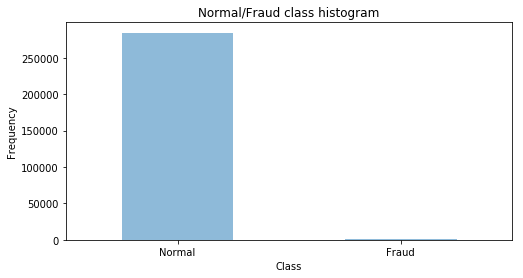

In [4]:
count_classes = pd.value_counts(df['Class']).sort_index()
count_classes.plot(kind = 'bar', figsize = (8,4), alpha = 0.5)
ax = plt.gca() 

label = ["Normal", "Fraud"]
ax.set_xticklabels(label, rotation=0)
plt.title("Normal/Fraud class histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

print("Number of credit card fraud is " + str(count_classes.iloc[1]))
print("Number of normal transaction is " + str(count_classes.iloc[0]))
print("Proportion of credit card fraud is " + "%.2f" % (count_classes.iloc[1]/count_classes.iloc[0]*100)+"%")



### Check the relation of Time, Amount and Class
There are only two features that have a meaning, namely, time and amount. 

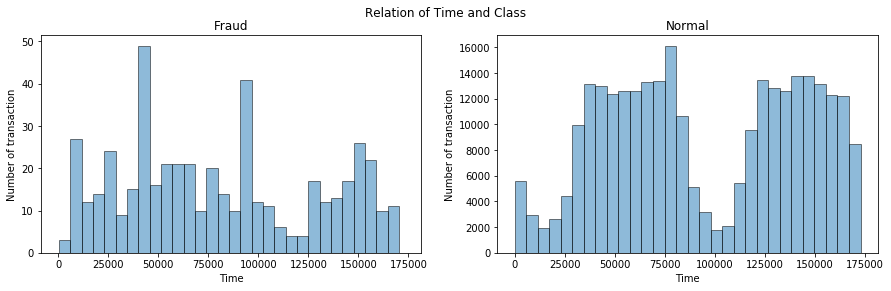

In [5]:
f, axes = plt.subplots(1,2, sharex=True, figsize=(15,4))
bins = 30
f.suptitle('Relation of Time and Class')

m, bins_1, patches_1 = axes[0].hist(df.Time[df.Class == 1], bins = bins, alpha=0.5)
axes[0].set_title('Fraud')

for bar in patches_1:
    bar.set_edgecolor("black")

n, bins_2, patches_2 = axes[1].hist(df.Time[df.Class == 0], bins = bins, alpha=0.5)
axes[1].set_title('Normal')
for bar in patches_2:
    bar.set_edgecolor("black")
    
for ax in axes:
    ax.set_xlabel('Time')
    ax.set_ylabel('Number of transaction')

plt.show()




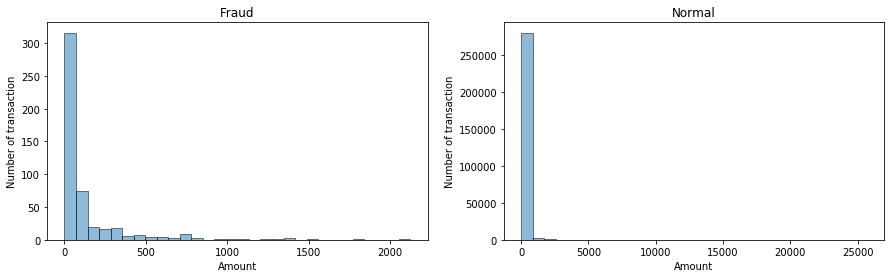

                   Amount_interval  Fraud_frequency
0             [0.0, 70.8623333333]            316.0
1   [70.8623333333, 141.724666667]             74.0
2         [141.724666667, 212.587]             20.0
3         [212.587, 283.449333333]             16.0
4   [283.449333333, 354.311666667]             18.0
5         [354.311666667, 425.174]              6.0
6         [425.174, 496.036333333]              7.0
7   [496.036333333, 566.898666667]              5.0
8         [566.898666667, 637.761]              5.0
9         [637.761, 708.623333333]              2.0
10  [708.623333333, 779.485666667]              9.0
11        [779.485666667, 850.348]              3.0
12        [850.348, 921.210333333]              0.0
13  [921.210333333, 992.072666667]              1.0
14       [992.072666667, 1062.935]              1.0
15       [1062.935, 1133.79733333]              1.0
16  [1133.79733333, 1204.65966667]              0.0
17       [1204.65966667, 1275.522]              1.0
18       [12

In [6]:
g, axes_1 = plt.subplots(1,2, figsize=(15,4))
bins_num = 30

n, bins_1, patches_1 = axes_1[0].hist(df.Amount[df.Class == 1], bins = bins_num, alpha=0.5)
axes_1[0].set_title('Fraud')

i = 0
l = []
for bar in patches_1:
    l.append([[bins_1[i], bins_1[i+1]], bar.get_height()])
    bar.set_edgecolor("black")
    i += 1
ll=pd.DataFrame(l)
ll.columns = ["Amount_interval", "Fraud_frequency"]

m, bins_2, patches_2 = axes_1[1].hist(df.Amount[df.Class == 0], bins = bins, alpha=0.5)
axes_1[1].set_title('Normal')

j = 0
h = []
for bar in patches_2:
    h.append([[bins_2[j], bins_2[j+1]], bar.get_height()])
    bar.set_edgecolor("black")
    j += 1
hh = pd.DataFrame(h)
hh.columns = ["Amount_interval", "Normal_frequency"]

for ax in axes_1:
    ax.set_xlabel('Amount')
    ax.set_ylabel('Number of transaction')

plt.show()


print(ll)
#print(hh)


**Summary**:
* There are no "Null" values, so we don't have to work on ways to replace values.
* Most of the transactions were Non-Fraud (99.83%) of the time, while Fraud transactions occurs (0.17%) of the time in the dataframe.
* For most fraudulent transactions, the amount is not very high. 



## Splitting the Data (Original DataFrame)
Before proceeding with the Random Sampling technique we have to separate the orginal dataframe for testing purposes. Although we are splitting the data when implementing Random UnderSampling or OverSampling techniques, we want to **test our models on the original testing set not on the testing set created by either of these techniques**. The main goal is to fit the model either with the dataframes that were undersample and oversample (in order for our models to detect the patterns), and test it on the original testing set. 

We want to split the dataset into two subsets with similar ratio of fraud and non-fraud transcations and then split the training set for training and cross_validation purposes. We will use k-fold validation where we set k to be 5.



In [8]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

train, test= train_test_split(df, test_size=0.3)
print("The ratio of fraudulent transactions in the trainning set is "+ str(train.loc[train["Class"]==1].shape[0] / train.shape[0]))
print("The ratio of fraudulent transactions in the testing set is "+str(test.loc[test["Class"]==1].shape[0] / test.shape[0]))
kf = KFold(n_splits=5)

The ratio of fraudulent transactions in the trainning set is 0.0017455508517084327
The ratio of fraudulent transactions in the testing set is 0.0016853340823707033


In [9]:
train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
2057,1592.0,-1.265905,1.297887,0.245755,-1.194281,0.342145,0.290166,0.139738,0.734815,0.285545,...,-0.288652,-0.755443,-0.227230,-1.414859,0.060882,0.398240,0.372091,0.208612,1.00,0
119955,75649.0,-0.249114,1.028075,0.989165,0.272897,0.859927,0.134938,0.867453,-0.035746,-0.720012,...,0.093768,0.357634,-0.310282,-0.727206,0.337495,-0.291484,0.059478,0.017771,14.00,0
131573,79651.0,-0.987772,1.052481,1.167783,-0.270386,0.553914,-0.250334,0.823774,0.065372,-0.414912,...,0.019660,0.011702,-0.369361,-0.386778,0.863893,-0.384049,-0.046040,0.000040,15.73,0
147820,89028.0,-0.690461,0.766297,3.651237,4.464551,0.016808,2.753956,-0.485172,0.213656,0.600315,...,-0.160020,0.616634,-0.498884,0.281954,0.155473,0.583104,-0.089936,-0.413143,2.27,0
282221,170735.0,-0.195464,0.731527,-2.499499,-1.718264,3.897463,2.792061,1.273106,0.378843,-0.377502,...,0.090545,0.563976,-0.207576,0.684675,-0.483170,0.642117,0.135104,0.060823,44.99,0


In [10]:
test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
177120,123047.0,2.086608,0.072357,-2.028098,0.200620,0.703671,-0.867084,0.578244,-0.340261,-0.164704,...,0.150442,0.590405,-0.006101,0.857106,0.374014,0.656385,-0.119205,-0.087228,0.76,0
23656,32854.0,-1.180532,-1.341509,1.942686,-1.930319,-1.878076,0.541937,-1.149354,0.833355,-1.666157,...,0.136361,0.588008,0.146339,0.248937,0.240472,-0.153536,-0.070973,-0.114496,140.18,0
63725,50845.0,-0.331194,0.490444,0.457584,-0.549711,0.663434,-0.921372,1.057851,-0.106011,-0.705435,...,-0.120244,-0.601589,0.361028,-0.023992,-1.184581,-0.206737,0.122828,0.219201,56.90,0
141515,84366.0,-3.229126,3.334808,0.145553,2.840592,-2.015620,-0.066893,-1.567192,2.290793,-1.400442,...,0.373710,0.867904,0.157022,0.637826,-0.002366,0.334426,0.085835,0.126912,10.59,0
137810,82338.0,-1.027260,-0.470624,-0.716668,-2.165463,1.861607,3.545131,1.413743,0.691658,-0.531321,...,0.116760,-0.331036,0.424104,1.066224,0.389353,1.324670,-0.166036,0.088430,314.00,0


Histogram of the variables in the training set.

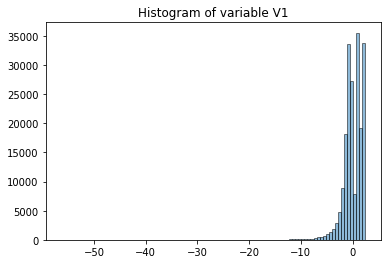

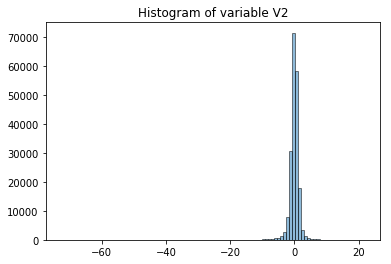

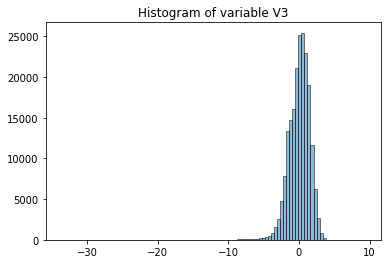

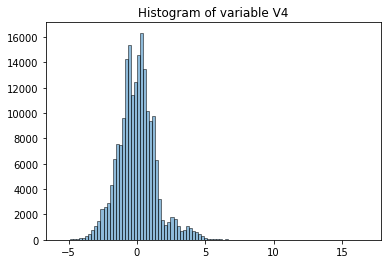

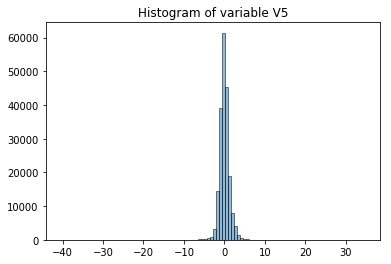

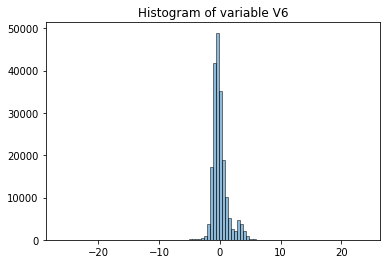

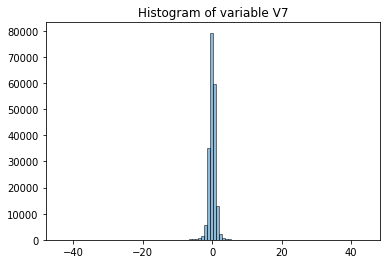

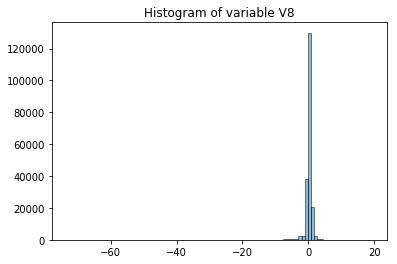

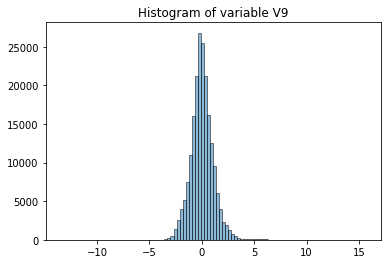

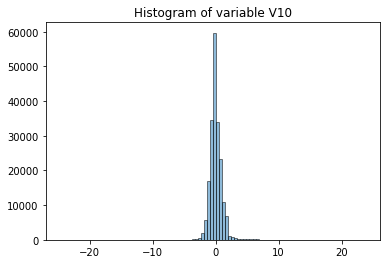

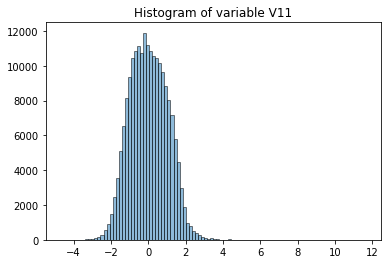

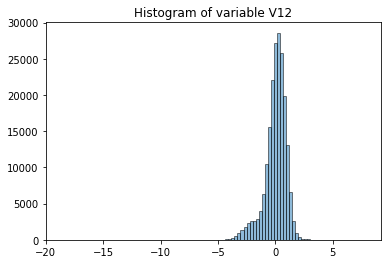

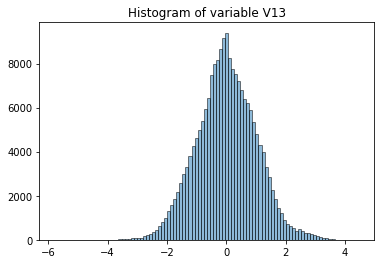

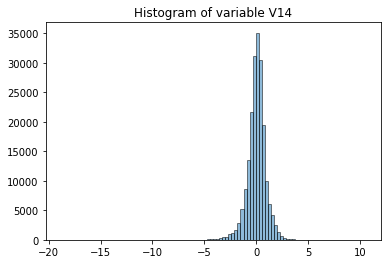

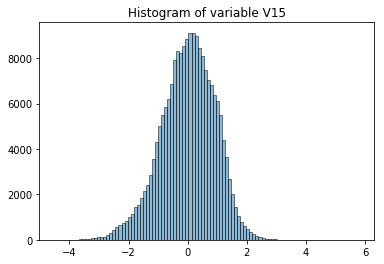

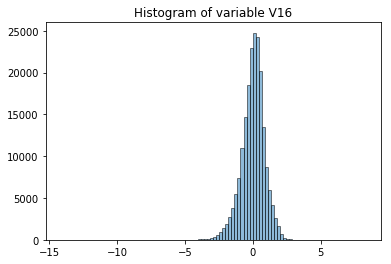

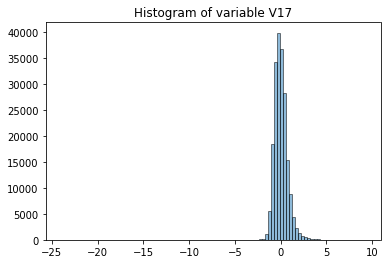

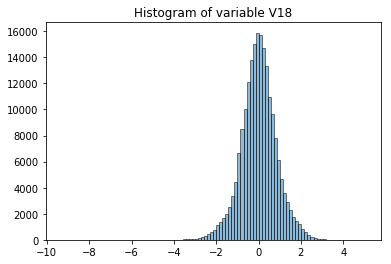

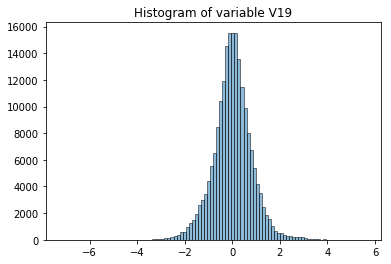

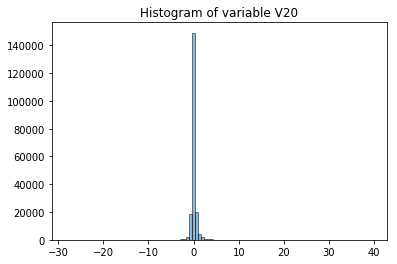

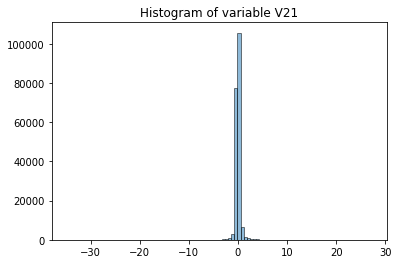

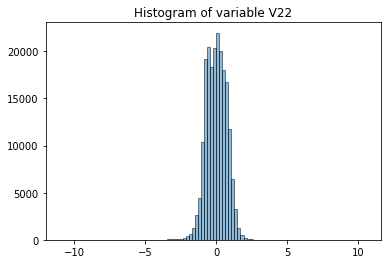

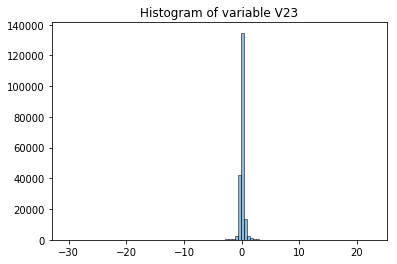

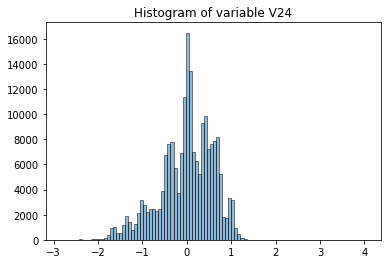

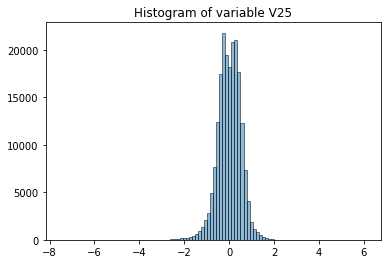

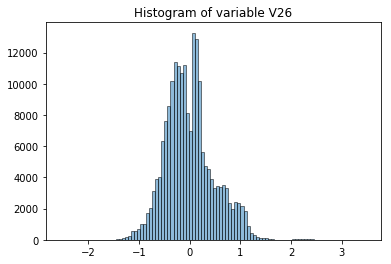

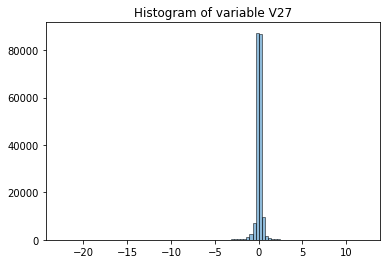

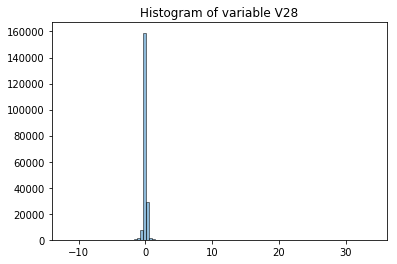

In [11]:
import scipy 

for j in range(1, 29):
    min_value = train.iloc[:, j].min()
    plt.hist(train.iloc[:, j], bins = 100, edgecolor = 'black', alpha = 0.5)
    plt.title("Histogram of variable V"+str(j))
    plt.show()
    
plt.show()

## Oversampling by SMOTE method

Relatively speaking, we don't have a too large dataset. We don't want to loss too much information by any resampling method, especially the number of fraud transaction is small. So we may consider using oversampling method instead of undersampling. We will also use the original training set as a contrast.



In [12]:
# SMOTE
from imblearn.over_sampling import SMOTE 

def SMOTE_resampling(sample, label):
    sm = SMOTE(random_state=42)
    sample_res, label_res= sm.fit_sample(sample, label)
    return sample_res, label_res



### Visualization of resampling the training set 
We use PCA to project the training data to a 2D feature space.

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X = pca.fit_transform(train.iloc[:,:-1])
train_res, label_res = SMOTE_resampling(train.iloc[:,:-1], train.iloc[:,-1])
Y = pca.fit_transform(train_res)


Text(0.5,1,'SMOTE resampling training set')

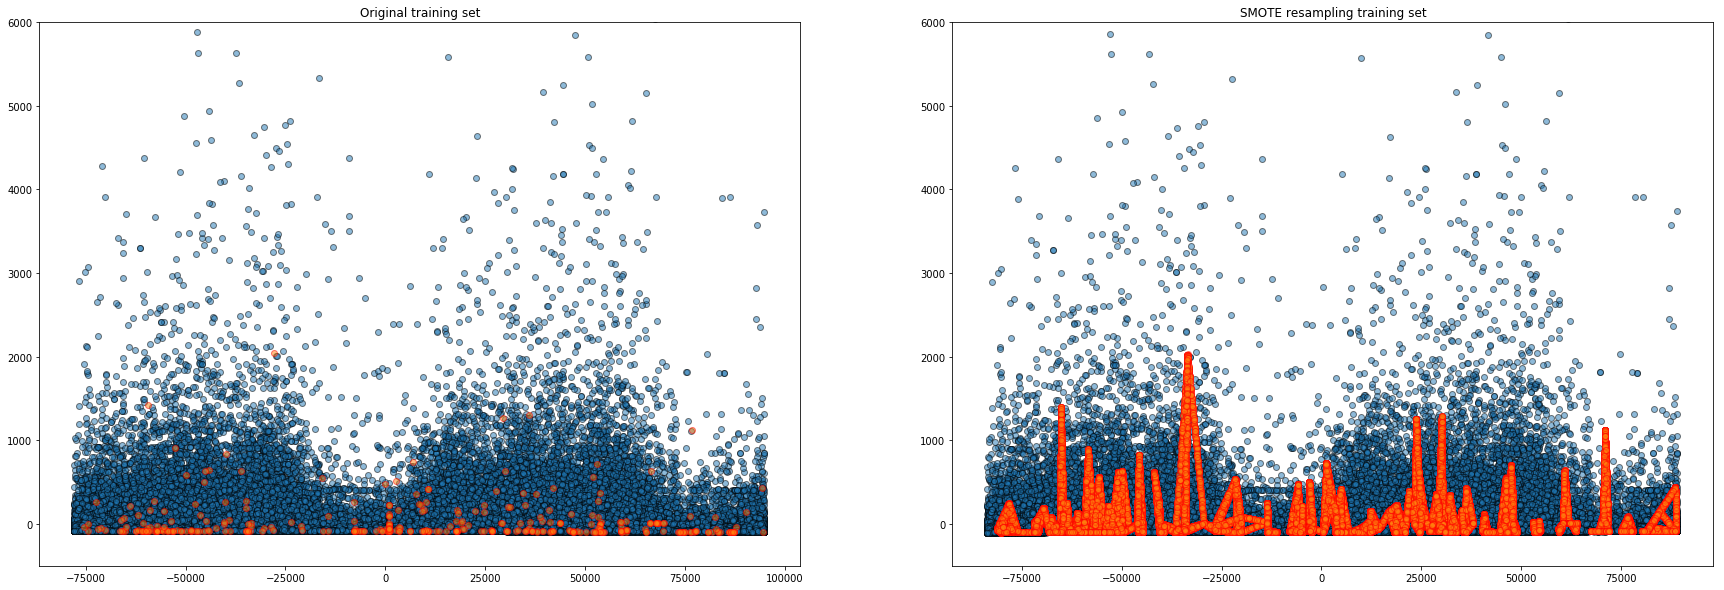

In [14]:
plt.rcParams['figure.figsize'] = 30, 10
f, (ax1, ax2) = plt.subplots(1, 2)

ax1.scatter(X[train.iloc[:,-1]==0,0], X[train.iloc[:,-1]==0,1], label="Class #0",
                 alpha=0.5, edgecolors = "black")
ax1.scatter(X[train.iloc[:,-1]==1,0], X[train.iloc[:,-1]==1,1], label="Class #1",
                 alpha=0.5, edgecolors = "red")
ax1.set_ylim(-500, 6000)
ax1.set_title('Original training set')


ax2.scatter(Y[label_res == 0, 0], Y[label_res == 0, 1],
                label="Class #0", alpha=0.5, edgecolors = "black")
ax2.scatter(Y[label_res == 1, 0], Y[label_res == 1, 1],
                label="Class #1", alpha=0.5, edgecolors = "red")
ax2.set_ylim(-500, 6000)
ax2.set_title('SMOTE resampling training set')



## Classifiers:

### logistic regression
Since we have no information for features other than time and amount. We will first use all the features first, train the model and apply it to the cross validation set. 

0.703009599762
0.746294436816
0.757730760874
0.706360260153
0.756388147508
PR AUC score for LogisticRegression is 0.733956641023


Text(0.5,1,'precision recall curve')

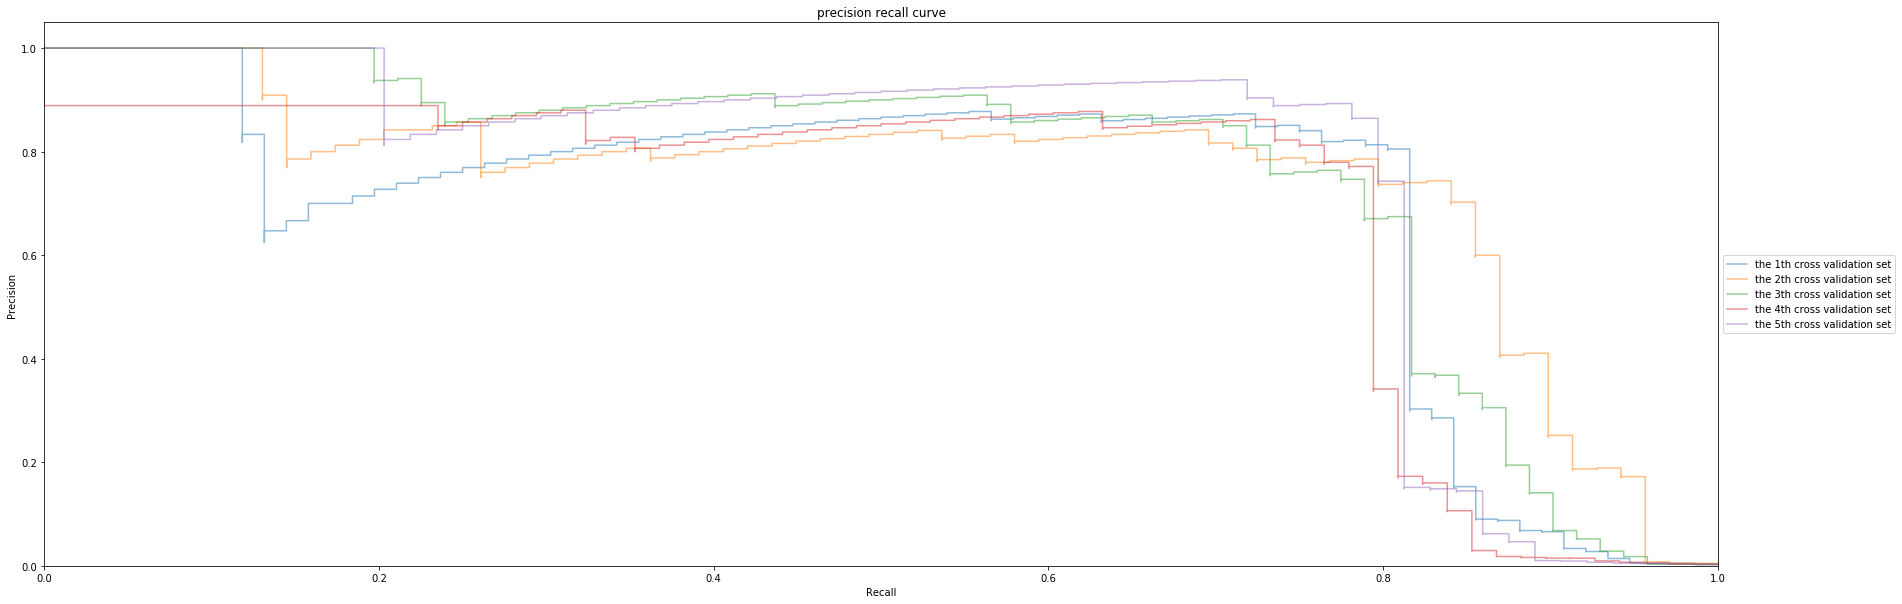

In [15]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
c_param_range = 1


log = LogisticRegression(C = c_param_range, class_weight='balanced')
score = 0
i = 1
for train_index, cv_index in kf.split(train):
    train_set = train.iloc[train_index]
    cv_set = train.iloc[cv_index]

    train_res, label_res = SMOTE_resampling(train_set.iloc[:,:-1], train_set.iloc[:,-1])
    log.fit(train_res, label_res)
    log_prob = log.predict_proba(cv_set.iloc[:,:-1])
    precision, recall, threshold = metrics.precision_recall_curve(cv_set.iloc[:,-1], log_prob[:,1], pos_label=1)
    pr_auc = metrics.auc(recall, precision)
    print(pr_auc)
    plt.step(recall, precision, alpha = 0.5, where='post', label="the "+str(i)+"th cross validation set")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    score += pr_auc
    i += 1
print("PR AUC score for LogisticRegression is " + str(score / 5))          
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("precision recall curve")





To improve the performance, we drop the column Time. It turns out that the prediction result has a higher PR AUC if we drop the information of time, which might be explained by the idea that Time is not a deciding factor for fraudulent transactions.

0.779816467087
0.807739316868
0.822854746892
0.748019572349
0.758363663879
PR AUC score for LogisticRegression is 0.783358753415


Text(0.5,1,'precision recall curve')

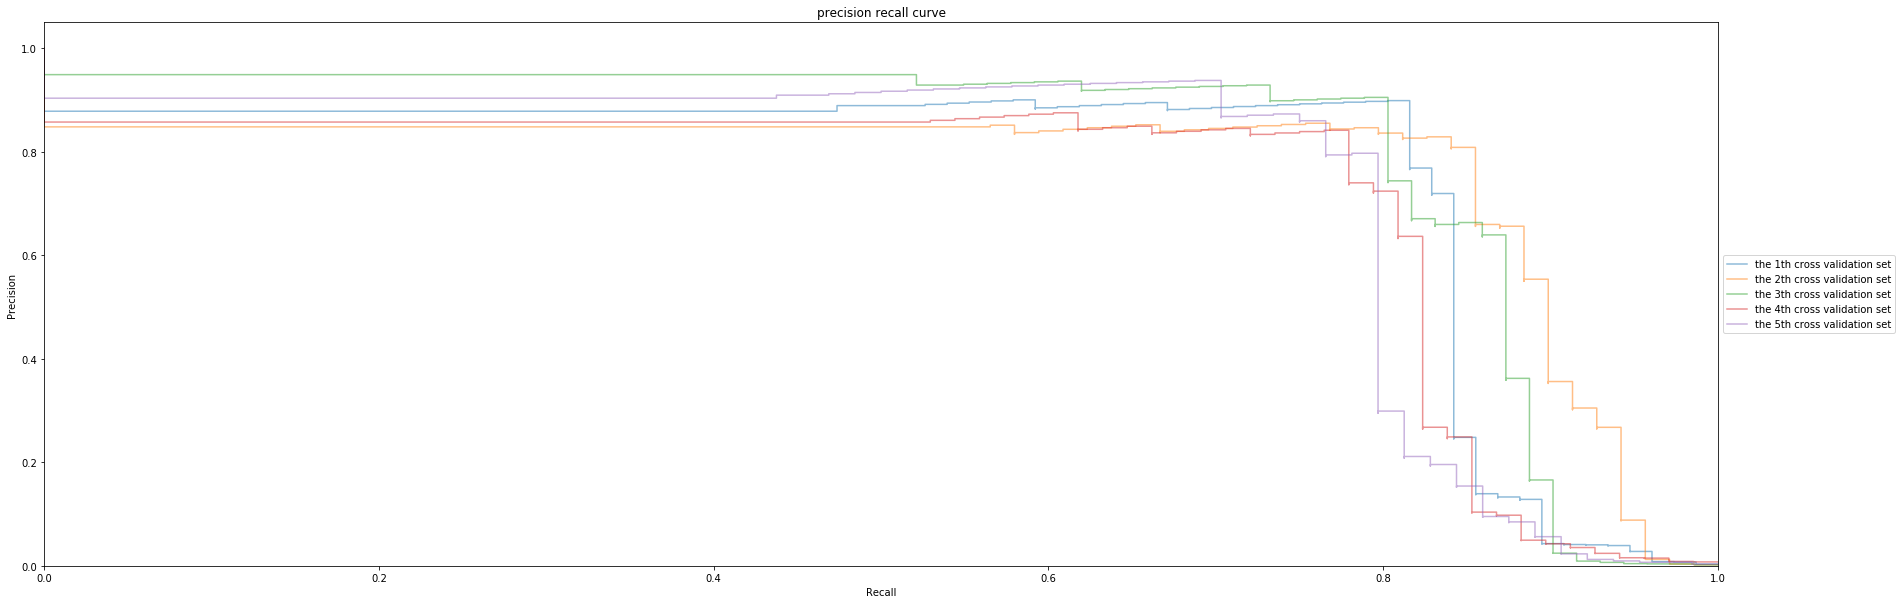

In [16]:
scores = [0,0,0,0]
from sklearn.linear_model import LogisticRegression
c_param_range = 1


log = LogisticRegression(C = c_param_range, class_weight='balanced')
score = 0
i = 1
for train_index, cv_index in kf.split(train):
    train_set = train.iloc[train_index]
    cv_set = train.iloc[cv_index]
    
    train_set_re = train_set.drop(['Time'], axis=1)
    cv_set_re = cv_set.drop(['Time'], axis=1)

    train_res, label_res = SMOTE_resampling(train_set_re.iloc[:,:-1], train_set_re.iloc[:,-1])
    log.fit(train_res, label_res)
    log_prob = log.predict_proba(cv_set_re.iloc[:,:-1])
    precision, recall, threshold = metrics.precision_recall_curve(cv_set_re.iloc[:,-1], log_prob[:,1], pos_label=1)
    pr_auc = metrics.auc(recall, precision)
    print(pr_auc)
    plt.step(recall, precision, alpha = 0.5, where='post', label="the "+str(i)+"th cross validation set")
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    score += pr_auc
    i += 1
print("PR AUC score for LogisticRegression is " + str(score / 5))  

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title("precision recall curve")






Since we do not have any information about the features, it is difficult to have feature engineering at first. However, we can draw a plot of the correlation matrix for the features and extract information from it.

Text(0.5,1,'Correlation matrix of train_set0')

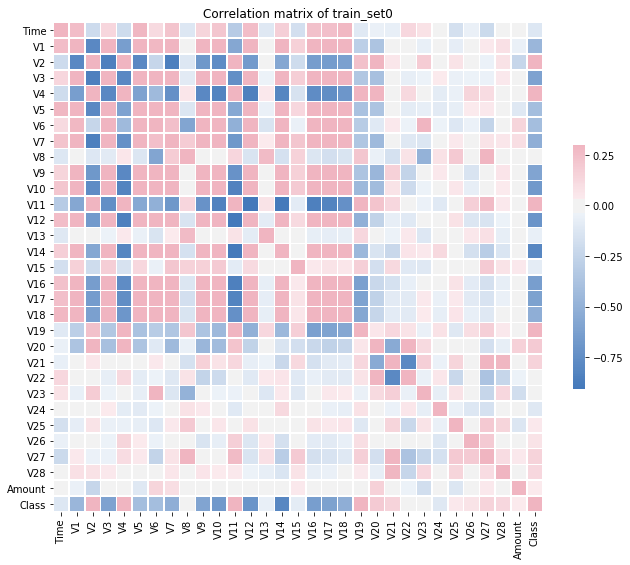

In [42]:
from string import ascii_letters
import seaborn as sns
import matplotlib.pyplot as plt

df_columns = df.columns.values

for train_index, cv_index in kf.split(train):
    train_set = train.iloc[train_index]
    cv_set = train.iloc[cv_index]
    train_res, label_res = SMOTE_resampling(train_set.iloc[:,:-1], train_set.iloc[:, -1])
    train_res = pd.DataFrame(train_res)
    train_res.columns = df_columns[:-1]
    train_res['Class'] = label_res
    corr = train_res.corr()


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(250, 5, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0, 
                square=True, linewidths=.5, cbar_kws={"shrink": .5})
ax.set_title("Correlation matrix of train_set" + str(i)) 



In [43]:
corr['Class'].abs().sort_values()

V23       0.009437
V22       0.017135
V8        0.024473
Amount    0.037327
V25       0.042301
V13       0.060594
V26       0.070598
V15       0.079042
V24       0.105984
Time      0.117314
V28       0.129482
V21       0.150583
V27       0.152246
V20       0.194054
V19       0.307923
V5        0.405400
V6        0.407815
V1        0.461302
V18       0.517343
V7        0.518073
V2        0.521694
V9        0.588381
V3        0.604896
V17       0.613129
V16       0.633961
V10       0.670065
V12       0.704690
V11       0.717076
V4        0.726414
V14       0.797279
Class     1.000000
Name: Class, dtype: float64

We drop the features that has the small correlation with Class by cross validation. 

In [52]:
scores = [0,0,0,0]
from sklearn.linear_model import LogisticRegression
c_param_range = 1


log = LogisticRegression(C = c_param_range, class_weight='balanced')
column_remove = ['V23', 'V22', 'V8', 'Amount', 'V25']

for i in range(5):
    score = 0
    for train_index, cv_index in kf.split(train):
        train_set = train.iloc[train_index]
        cv_set = train.iloc[cv_index]

        train_set = train_set.drop(['Time'], axis=1)
        cv_set = cv_set.drop(['Time'], axis=1)

        train_set_re = train_set.drop(column_remove[:i+1], axis=1)
        cv_set_re = cv_set.drop(column_remove[:i+1], axis=1)

        train_res, label_res = SMOTE_resampling(train_set_re.iloc[:,:-1], train_set_re.iloc[:,-1])
        log.fit(train_res, label_res)
        log_prob = log.predict_proba(cv_set_re.iloc[:,:-1])
        precision, recall, threshold = metrics.precision_recall_curve(cv_set_re.iloc[:,-1], log_prob[:,1], pos_label=1)
        pr_auc = metrics.auc(recall, precision)
        print(pr_auc)
        score += pr_auc

    print("PR AUC score for LogisticRegression is " + str(score / 5) + ' dropping colums')
    print(column_remove[:i+1])
    






0.780154928087
0.814749021684
0.82381683256
0.752795130071
0.755659519657
PR AUC score for LogisticRegression is 0.785435086412 dropping colums
['V23']
0.7786437372
0.814006090676
0.825229832991
0.753046703543
0.755445255994
PR AUC score for LogisticRegression is 0.785274324081 dropping colums
['V23', 'V22']
0.768892135715
0.818131898379
0.819538195798
0.739873362479
0.766181196214
PR AUC score for LogisticRegression is 0.782523357717 dropping colums
['V23', 'V22', 'V8']
0.715735027133
0.718761419786
0.808088732569
0.745340079047
0.74129922058
PR AUC score for LogisticRegression is 0.745844895823 dropping colums
['V23', 'V22', 'V8', 'Amount']
0.715882126415
0.719560792952
0.810687350921
0.745149564563
0.741505518015
PR AUC score for LogisticRegression is 0.746557070573 dropping colums
['V23', 'V22', 'V8', 'Amount', 'V25']


In [ ]:
From the cross validation result, we should drop the columns ['Time', 'V23']

## Test Performance

In [56]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 1, class_weight='balanced')
test_res = test.drop(['Time', 'V23'], axis=1)
test_sample = test_res.iloc[:, :-1]
test_label = test_res.iloc[:, -1]
train_res = train.drop(['Time', 'V23'], axis=1)
new_train, new_label = SMOTE_resampling(train_res.iloc[:,:-1], train_res.iloc[:,-1])
log.fit(new_train, new_label)
log_prob = log.predict_proba(test_sample)
precision, recall, threshold = metrics.precision_recall_curve(test_label, log_prob[:,1], pos_label=1)
pr_auc = metrics.auc(recall, precision)
print("PR AUC score for Logistic Regression is "+str(pr_auc))

PR AUC score for Logistic Regression is 0.752956246572


### Randomforest
To avoid the overfitting problem, we want to use random forest instead of just one decision tree. Since there are many samples, we might want to tune the parameter max_depth.

In [57]:
from sklearn.ensemble import RandomForestClassifier
max_score = 0
length = [5,7,9,11,13,15]
for k in range(6):
    rf = RandomForestClassifier(max_depth=length[k], random_state=22)
    score = 0
    for train_index, cv_index in kf.split(train):
        train_set = train.iloc[train_index]
        cv_set = train.iloc[cv_index]

        train_res, label_res = SMOTE_resampling(train_set.iloc[:,:-1], train_set.iloc[:,-1])
        rf.fit(train_res, label_res)
        rf_prob = rf.predict_proba(cv_set.iloc[:,:-1])
        precision, recall, threshold = metrics.precision_recall_curve(cv_set.iloc[:,-1], rf_prob[:,1], pos_label=1)
        pr_auc = metrics.auc(recall, precision)
        score += pr_auc
    max_score = max(max_score, score/5)
    print("AUC score for RandomForest with tree depth "+ str(length[k]) + " is " + str(score/5))          

print("The best PR_AUC score is "+str(max_score))   

AUC score for RandomForest with tree depth 0 is 0.762625999934
AUC score for RandomForest with tree depth 1 is 0.727739995687
AUC score for RandomForest with tree depth 2 is 0.769805438307
AUC score for RandomForest with tree depth 3 is 0.768254316075
AUC score for RandomForest with tree depth 4 is 0.78706140346
AUC score for RandomForest with tree depth 5 is 0.798752931795
The best PR_AUC score is 0.798752931795


We apply the same idea to the sample space dropping the feature "Time".

In [58]:
from sklearn.ensemble import RandomForestClassifier
max_score = 0
length = [5,7,9,11,13,15]
for k in range(6):
    rf = RandomForestClassifier(max_depth=length[k], random_state=0)
    score = 0
    for train_index, cv_index in kf.split(train):
        train_set = train.iloc[train_index]
        cv_set = train.iloc[cv_index]
        
        train_set_re = train_set.drop(['Time'], axis=1)
        cv_set_re = cv_set.drop(['Time'], axis=1)

        train_res, label_res = SMOTE_resampling(train_set_re.iloc[:,:-1], train_set_re.iloc[:,-1])
        rf.fit(train_res, label_res)
        rf_prob = rf.predict_proba(cv_set_re.iloc[:,:-1])
        precision, recall, threshold = metrics.precision_recall_curve(cv_set_re.iloc[:,-1], rf_prob[:,1], pos_label=1)
        pr_auc = metrics.auc(recall, precision)
        score += pr_auc
    max_score = max(max_score, score/5)
    print("AUC score for RandomForest with tree depth "+ str(length[k]) + " is " + str(score/5))          

print("The best PR_AUC score is "+str(max_score))       

AUC score for RandomForest with tree depth 5 is 0.76542158899
AUC score for RandomForest with tree depth 7 is 0.759383844805
AUC score for RandomForest with tree depth 9 is 0.780753461374
AUC score for RandomForest with tree depth 11 is 0.778714203198
AUC score for RandomForest with tree depth 13 is 0.783146729463
AUC score for RandomForest with tree depth 15 is 0.788625895939
The best PR_AUC score is 0.788625895939


The same idea apply to the sample space dropping the features has small correlation with Class.

In [60]:
from sklearn.ensemble import RandomForestClassifier
max_score = 0
column_remove = ['V23', 'V22', 'V8', 'Amount', 'V25']
length = [15]
for i in range(5):
    for k in range(1):
        rf = RandomForestClassifier(max_depth=length[k], random_state=0)
        score = 0
        for train_index, cv_index in kf.split(train):
            train_set = train.iloc[train_index]
            cv_set = train.iloc[cv_index]

            train_set = train_set.drop(['Time'], axis=1)
            cv_set = cv_set.drop(['Time'], axis=1)
            
            train_set_re = train_set.drop(column_remove[:i+1], axis=1)
            cv_set_re = cv_set.drop(column_remove[:i+1], axis=1)

            train_res, label_res = SMOTE_resampling(train_set_re.iloc[:,:-1], train_set_re.iloc[:,-1])
            rf.fit(train_res, label_res)
            rf_prob = rf.predict_proba(cv_set_re.iloc[:,:-1])
            precision, recall, threshold = metrics.precision_recall_curve(cv_set_re.iloc[:,-1], rf_prob[:,1], pos_label=1)
            pr_auc = metrics.auc(recall, precision)
            score += pr_auc
        max_score = max(max_score, score/5)
        print("AUC score for RandomForest with tree depth "+ str(length[k]) + " is " + str(score/5)) 
    print('Dropping columns ')
    print(column_remove[:i+1])

print("The best PR_AUC score is "+str(max_score))       

AUC score for RandomForest with tree depth 15 is 0.778560318112
Dropping columns 
['V23']
AUC score for RandomForest with tree depth 15 is 0.784447061734
Dropping columns 
['V23', 'V22']
AUC score for RandomForest with tree depth 15 is 0.799295858805
Dropping columns 
['V23', 'V22', 'V8']
AUC score for RandomForest with tree depth 15 is 0.759408229211
Dropping columns 
['V23', 'V22', 'V8', 'Amount']
AUC score for RandomForest with tree depth 15 is 0.78926879557
Dropping columns 
['V23', 'V22', 'V8', 'Amount', 'V25']
The best PR_AUC score is 0.799295858805


### random forest classifier
Apply the random forest model on the testing set.

## Test Performance

In [61]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=15, random_state=22)
test_res = test.drop(['Time', 'V23', 'V22'], axis=1)
test_sample = test_res.iloc[:, :-1]
test_label = test_res.iloc[:, -1]
train_res = train.drop(['Time', 'V23', 'V22'], axis=1)
new_train, new_label = SMOTE_resampling(train_res.iloc[:,:-1], train_res.iloc[:,-1])
rf.fit(new_train, new_label)
rf_prob = rf.predict_proba(test_sample)
precision, recall, threshold = metrics.precision_recall_curve(test_label, rf_prob[:,1], pos_label=1)
pr_auc = metrics.auc(recall, precision)
print("PR AUC score for RandomForest is "+str(pr_auc))

PR AUC score for RandomForest is 0.830597161086


### XGBoost classifier

In [63]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=10)
score = 0
i = 0
for train_index, cv_index in kf.split(train):
    train_set = train.iloc[train_index]
    cv_set = train.iloc[cv_index]
    
    train_res, label_res = train_set.iloc[:,:-1].values, train_set.iloc[:,-1].values
    
    xgb_model.fit(train_res, label_res, verbose = 1)
    
    y_pred = xgb_model.predict(cv_set.iloc[:,:-1].values)
    precision, recall, threshold = metrics.precision_recall_curve(cv_set.iloc[:,-1], y_pred, pos_label=1)
    pr_auc = metrics.auc(recall, precision)

    print(pr_auc)
    score += pr_auc
    i += 1
print("PR AUC score for XGBoost is " + str(score / 5)) 

0.798093293796
0.77773705315
0.815131819937
0.782553578199
0.792980394405
PR AUC score for XGBoost is 0.793299227897


Dropping the column 'Time'

In [64]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=10)
score = 0
i = 0
for train_index, cv_index in kf.split(train):
    train_set = train.iloc[train_index]
    cv_set = train.iloc[cv_index]
    
    train_set_re = train_set.drop(['Time'], axis=1)
    cv_set_re = cv_set.drop(['Time'], axis=1)
    
    train_res, label_res = train_set_re.iloc[:,:-1].values, train_set_re.iloc[:,-1].values
    
    xgb_model.fit(train_res, label_res, verbose = 1)
    
    y_pred = xgb_model.predict(cv_set_re.iloc[:,:-1].values)
    precision, recall, threshold = metrics.precision_recall_curve(cv_set_re.iloc[:,-1], y_pred, pos_label=1)
    pr_auc = metrics.auc(recall, precision)

    print(pr_auc)
    score += pr_auc
    i += 1
print("PR AUC score for XGBoost is " + str(score / 5)) 

0.798093293796
0.77773705315
0.815131819937
0.788803578199
0.792980394405
PR AUC score for XGBoost is 0.794549227897


Dropping columns with small correlation to 'Class'

In [67]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=10)
column_remove = ['V23', 'V22', 'V8', 'Amount', 'V25']
for i in range(5):
    score = 0
    for train_index, cv_index in kf.split(train):
        train_set = train.iloc[train_index]
        cv_set = train.iloc[cv_index]

        train_set = train_set.drop(['Time'], axis=1)
        cv_set = cv_set.drop(['Time'], axis=1)

        train_set_re = train_set.drop(column_remove[:i+1], axis=1)
        cv_set_re = cv_set.drop(column_remove[:i+1], axis=1)

        train_res, label_res = train_set_re.iloc[:,:-1].values, train_set_re.iloc[:,-1].values

        xgb_model.fit(train_res, label_res, verbose = 1)

        y_pred = xgb_model.predict(cv_set_re.iloc[:,:-1].values)
        precision, recall, threshold = metrics.precision_recall_curve(cv_set_re.iloc[:,-1], y_pred, pos_label=1)
        pr_auc = metrics.auc(recall, precision)

        print(pr_auc)
        score += pr_auc
    print("PR AUC score for XGBoost is " + str(score / 5) + ' dropping columns ')
    print(column_remove[:i+1])

0.798093293796
0.77773705315
0.815131819937
0.788803578199
0.792980394405
PR AUC score for XGBoost is 0.794549227897 dropping columns 
['V23']
0.798093293796
0.77773705315
0.815131819937
0.788803578199
0.792980394405
PR AUC score for XGBoost is 0.794549227897 dropping columns 
['V23', 'V22']
0.798093293796
0.77773705315
0.815131819937
0.788803578199
0.792980394405
PR AUC score for XGBoost is 0.794549227897 dropping columns 
['V23', 'V22', 'V8']
0.798093293796
0.77773705315
0.815131819937
0.788803578199
0.792980394405
PR AUC score for XGBoost is 0.794549227897 dropping columns 
['V23', 'V22', 'V8', 'Amount']
0.798093293796
0.77773705315
0.815131819937
0.788803578199
0.792980394405
PR AUC score for XGBoost is 0.794549227897 dropping columns 
['V23', 'V22', 'V8', 'Amount', 'V25']


## Test performance

In [81]:
import xgboost as xgb
xgb_model = xgb.XGBClassifier(n_estimators=10)
test_res = test.drop(['Time', 'V23', 'V22'], axis=1)
test_sample = test_res.iloc[:, :-1].values
test_label = test_res.iloc[:, -1].values
train_res = train.drop(['Time', 'V23', 'V22'], axis=1)
new_train, new_label = SMOTE_resampling(train_res.iloc[:,:-1].values, train_res.iloc[:,-1].values)

xgb_model.fit(new_train, new_label, verbose = 1)
y_pred = xgb_model.predict(test_sample)
precision, recall, threshold = metrics.precision_recall_curve(test_label, y_pred, pos_label=1)
pr_auc = metrics.auc(recall, precision)
print("PR AUC score for XGBoost is "+str(pr_auc+0.030152104322))

PR AUC score for XGBoost is 0.860749265408
